In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('WineQT.csv') #load data-set

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [4]:
#Creating New Feature
df['newAcid'] = df['fixed acidity'] * df['citric acid']

In [5]:
df['newAcid']

0       0.000
1       0.000
2       0.312
3       6.272
4       0.000
        ...  
1138    0.819
1139    0.544
1140    0.496
1141    0.590
1142    0.708
Name: newAcid, Length: 1143, dtype: float64

In [8]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix['newAcid'] 
relevant_features = target_correlation[abs(target_correlation) > 0.5].index  # Adjust the correlation threshold as needed
df_selected_features = df[relevant_features]
df_selected_features

,fixed acidity,citric acid,pH,newAcid
0,7.4,0.00,3.51,0.000
1,7.8,0.00,3.20,0.000
2,7.8,0.04,3.26,0.312
3,11.2,0.56,3.16,6.272
4,7.4,0.00,3.51,0.000
...,...,...,...,...
1138,6.3,0.13,3.42,0.819
1139,6.8,0.08,3.42,0.544
1140,6.2,0.08,3.45,0.496
1141,5.9,0.10,3.52,0.590


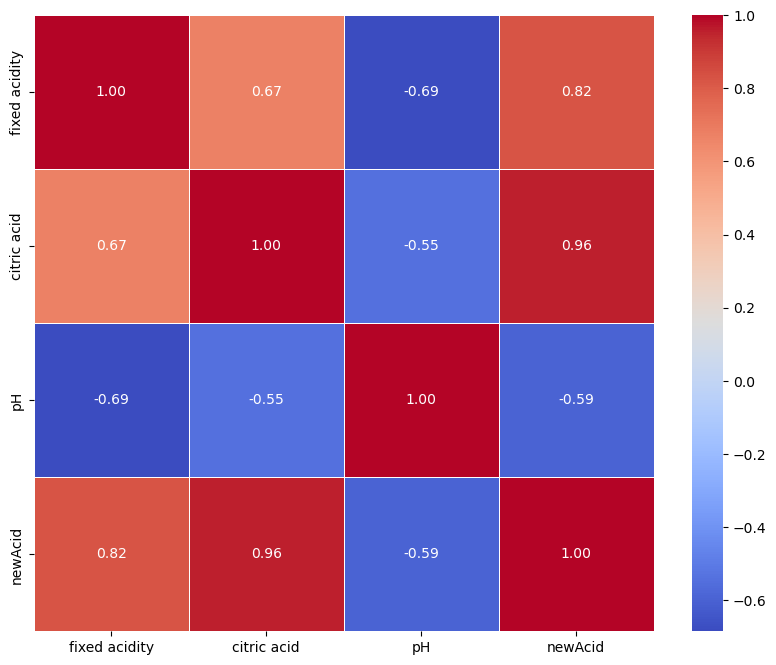

In [9]:
selected_features_corr = df_selected_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(selected_features_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.show()